### Deliverable 1: Preprocessing the Data for a Neural Network

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
from google.colab import files
import io


In [6]:
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [7]:
# Reading in CSV
application_df = pd.read_csv(io.StringIO(uploaded['charity_data.csv'].decode('utf-8')))
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(["EIN","NAME"], axis= 1)
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [8]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
count_application_type = application_df.APPLICATION_TYPE.value_counts()
count_application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

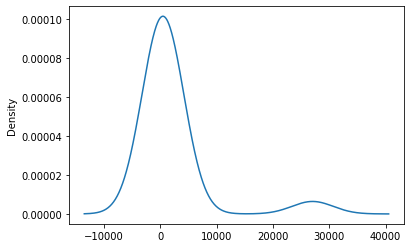

In [10]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
count_application_type.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(count_application_type[count_application_type < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
count_classification = application_df.CLASSIFICATION.value_counts()
count_classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C1820        1
C4200        1
C4120        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

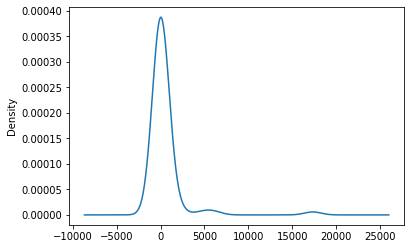

In [13]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
count_classification.plot.density()

In [14]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(count_application_type[count_application_type < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C1820        1
C4200        1
C4120        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [15]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  ...  SPECIAL_CONSIDERATIONS_Y
0                     0.0  ...                       0.0
1                     0.0  ...                       0.0
2                     0.0  ...                       0.0
3                     0.0  ...                       0.0
4                     0.0  ...                       0.0

[5 rows x 106 columns]

In [17]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df

STATUS   ASK_AMT  ...  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y
0           1      5000  ...                       1.0                       0.0
1           1    108590  ...                       1.0                       0.0
2           1      5000  ...                       1.0                       0.0
3           1      6692  ...                       1.0                       0.0
4           1    142590  ...                       1.0                       0.0
...       ...       ...  ...                       ...                       ...
34294       1      5000  ...                       1.0                       0.0
34295       1      5000  ...                       1.0                       0.0
34296       1      5000  ...                       1.0                       0.0
34297       1      5000  ...                       1.0                       0.0
34298       1  36500179  ...                       1.0                       0.0

[34299 rows x 109 columns]

In [25]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df["ASK_AMT"].values
X = application_df.drop("IS_SUCCESSFUL",1).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 872       
                                                                 
 dense_10 (Dense)            (None, 5)                 45        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 923
Trainable params: 923
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
#  YOUR CODE GOES HERE
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/5
795/804 [============================>.] - ETA: 0s - loss: -3808551936.0000 - accuracy: 0.0000e+00
Epoch 00001: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 3s 3ms/step - loss: -3781014784.0000 - accuracy: 0.0000e+00
Epoch 2/5
793/804 [============================>.] - ETA: 0s - loss: -3367950848.0000 - accuracy: 0.0000e+00
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: -3951511040.0000 - accuracy: 0.0000e+00
Epoch 3/5
792/804 [============================>.] - ETA: 0s - loss: -4179447552.0000 - accuracy: 0.0000e+00
Epoch 00003: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: -4124827648.0000 - accuracy: 0.0000e+00
Epoch 4/5
788/804 [============================>.] - ETA: 0s - loss: -4299761152.0000 - accuracy: 0.0000e+00
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==================

In [ ]:
# Train the model
#  YOUR CODE GOES HERE

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")